In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('C:\\Users\\manan\\OneDrive\\Desktop\\Iris.csv')
key = 150

In [3]:
values = iris.drop(['Id','Species'], axis=1)
index = list(range(0,key))
present = index.copy()
present = [[x] for x in present]

In [4]:
big = 100
values = np.array(values)
def matrix():
    n = len(present)
    minm = big
    arr = np.zeros([n,n])
    for indi,i in enumerate(present):
        for indj,j in enumerate(present):
            if(indi==indj):
                arr[indi,indj] = big
            else:
                for x in i:
                    for y in j:
                        xy = np.sqrt(np.sum((values[x]-values[y])**2))
                        if xy<minm:
                            minm = xy
                arr[indi,indj] = minm
                minm = big
    return arr
def find_min(arr):
    n = len(arr)
    minm = big
    mini,minj = 0,0
    for i in range(n):
        for j in range(n):
            if arr[i,j]<minm:
                minm = arr[i,j]
                mini,minj = i,j
    return mini,minj

In [5]:
dendo = []
dendo.append(index.copy())
for i in range(key-1):
    proximity = matrix()
    i,j = find_min(proximity)
    for x in present[j]:
        index[x] = present[i][0]
    present[i].extend(present[j])
    del present[j]
    dendo.append(index.copy())

In [6]:
exc = pd.DataFrame(dendo)
exc.to_excel('exc.xlsx')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot(m = 1):
    mult = -1*m
    color = list(colors.CSS4_COLORS.values())
    data = dendo[mult]
    tocheck = set(data.copy())
    data = np.array(data)
    X = iris['PetalLengthCm']
    Y = iris['PetalWidthCm']
    count = 0
    plt.figure(figsize = (10,10))
    for i in tocheck:
        x = []
        y = []
        for j in range(key):
            if data[j]==i:
                x.append(X[j])
                y.append(Y[j])
        plt.scatter(x,y,c=color[count+10])
        count+=1

    plt.show

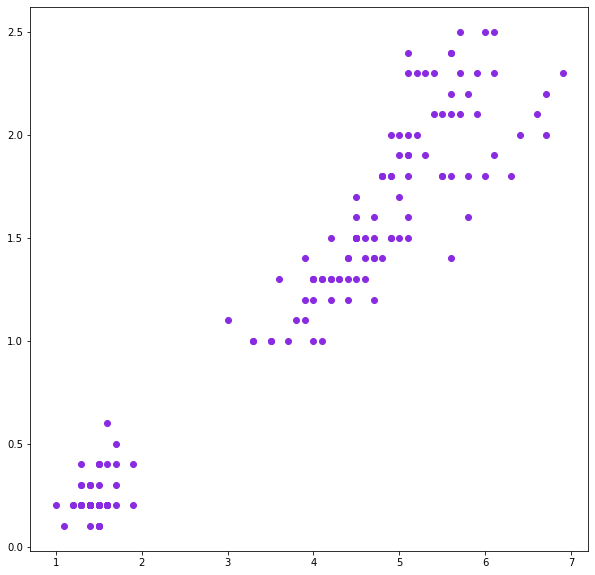

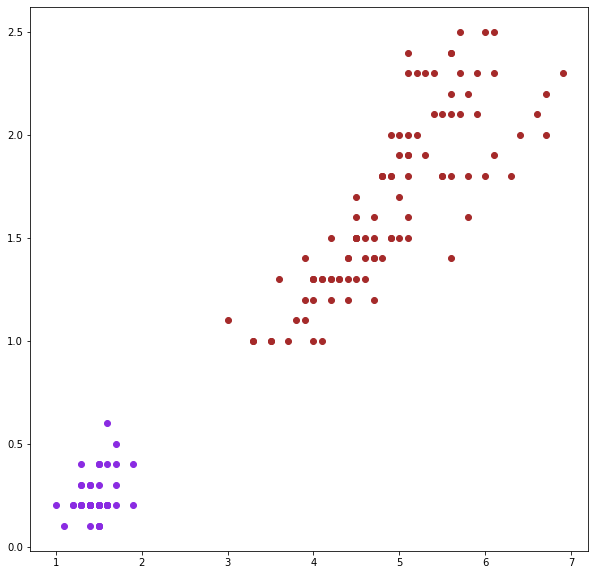

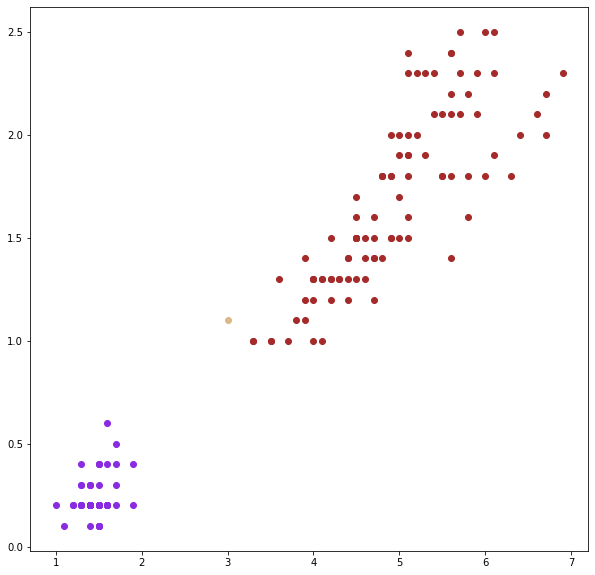

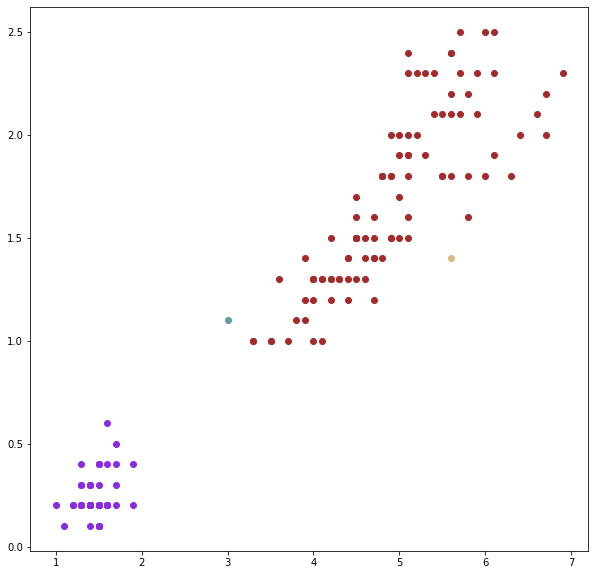

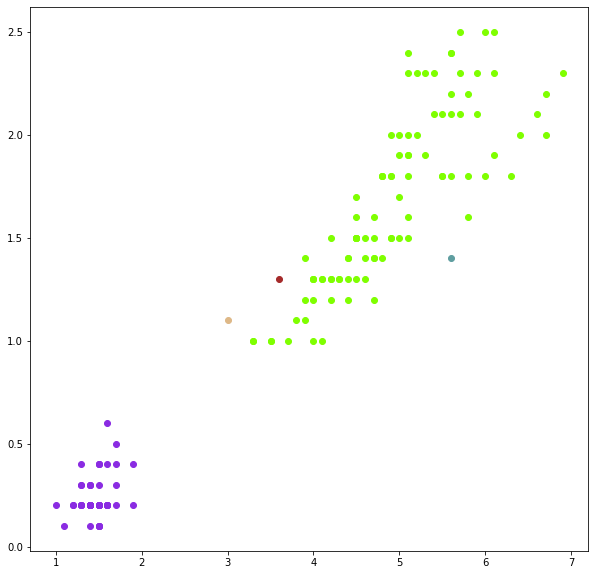

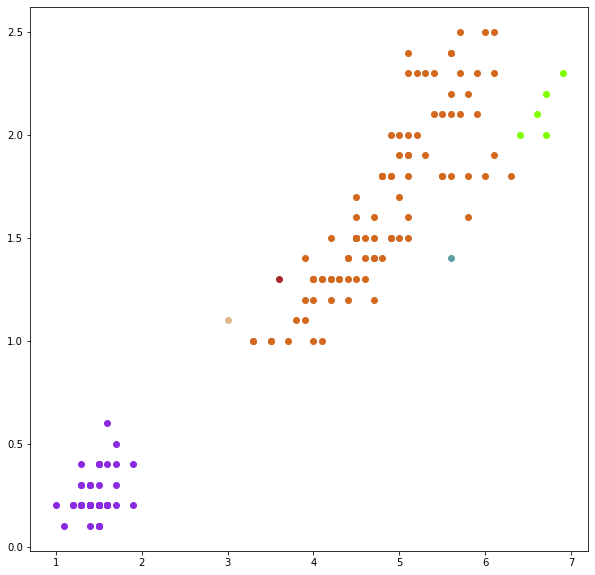

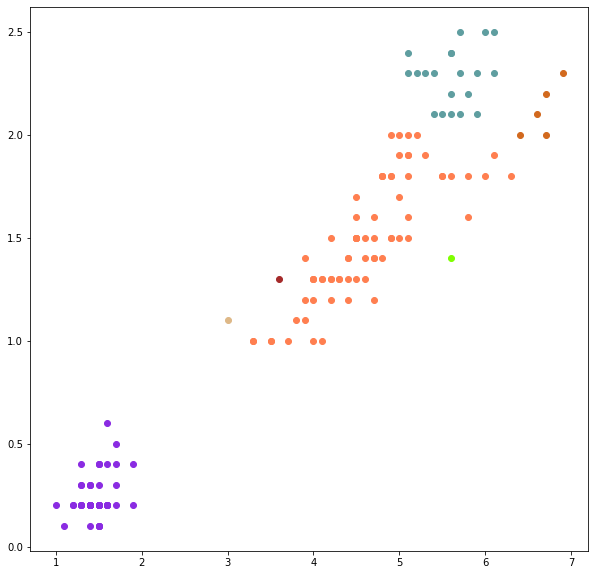

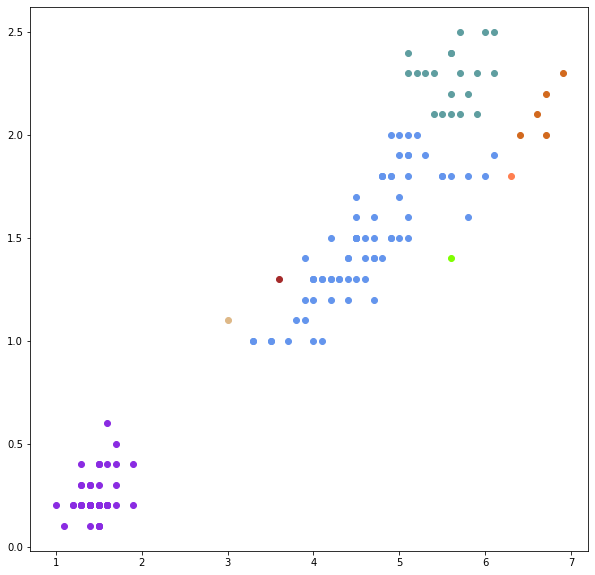

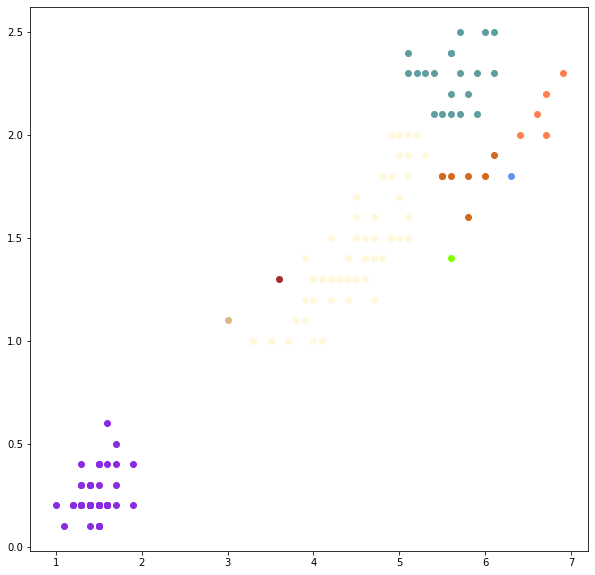

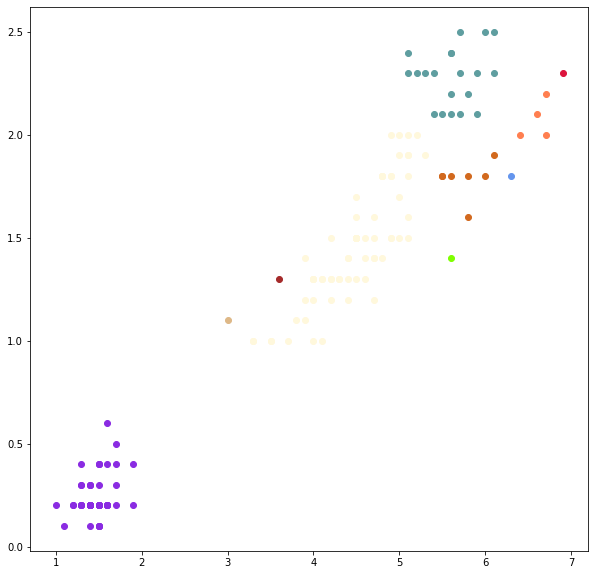

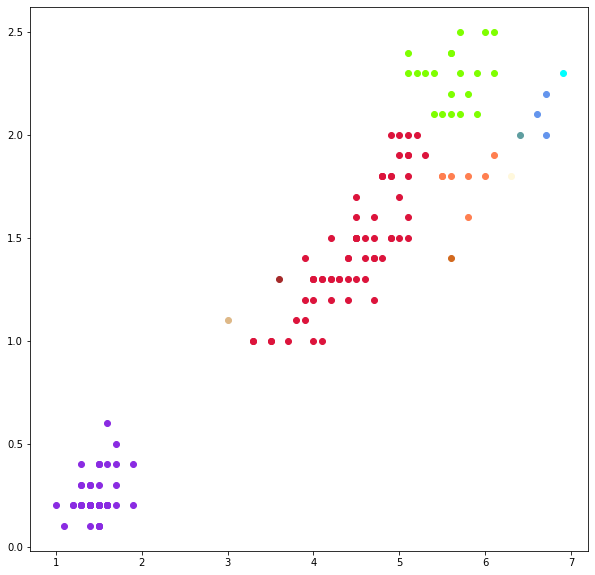

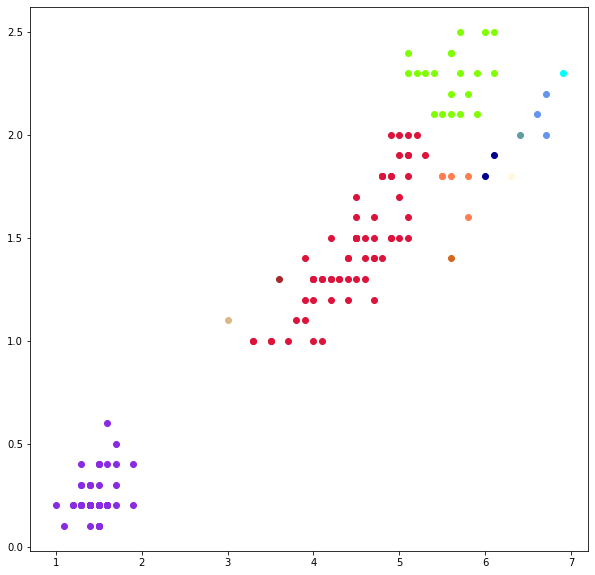

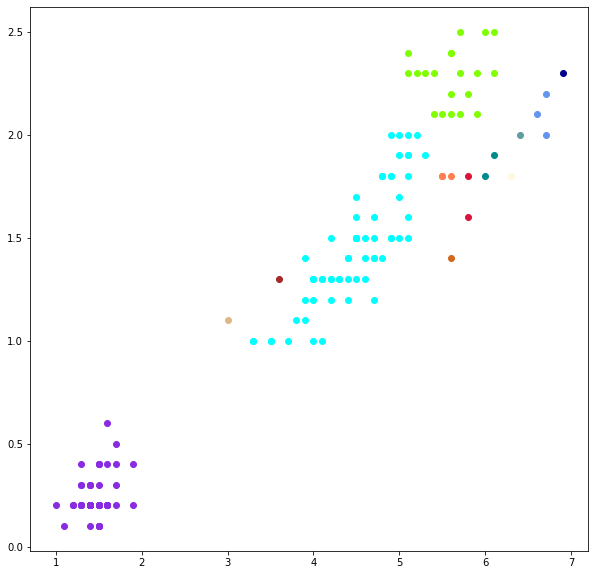

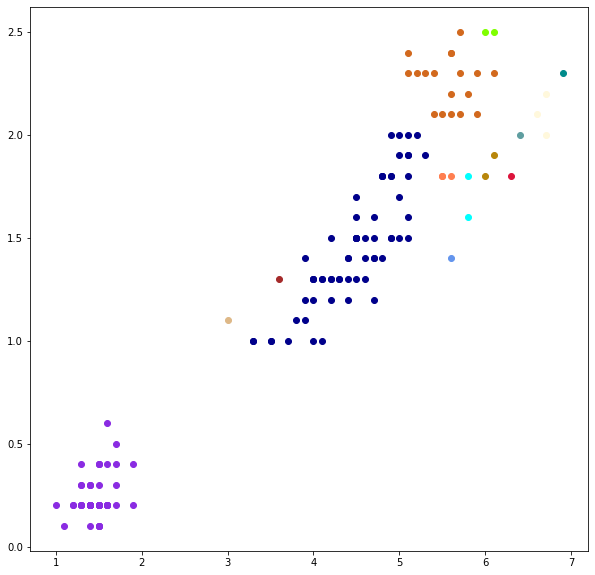

In [8]:
for i in range(1,15):
    plot(i)

In [ ]:

print(colors.CSS4_COLORS.values())